<a href="https://colab.research.google.com/github/ankitstar01/ml_test/blob/master/Smart%20Composer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Composer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

#importing os environment
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/Kaggle"
%cd Kaggle/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
[Errno 2] No such file or directory: 'Kaggle/'
/content


In [4]:
import shutil
import requests

shutil.copyfile("/content/drive/My Drive/Colab Notebooks/globe.zip","/content/globe.zip")

!mkdir Kaggle
shutil.copyfile("/content/drive/My Drive/Colab Notebooks/kaggle.json","/content/Kaggle/kaggle.json")
#downloading the kaggle dataset
!kaggle datasets download -d wcukierski/enron-email-dataset

#unzipping the zip files
!unzip \*.zip

 98% 352M/358M [00:02<00:00, 128MB/s]
100% 358M/358M [00:03<00:00, 124MB/s]
Archive:  globe.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       

Archive:  enron-email-dataset.zip
  inflating: emails.csv              

2 archives were successfully processed.


In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import email
import re
import shutil
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, LSTM, Flatten, TimeDistributed, Dropout, LSTMCell, RNN, Bidirectional, Concatenate, Layer


In [55]:
# shutil.move("/content/gdrive/My Drive/Kaggle/emails.csv","/content/emails.csv")
#reading the emails
if not 'emails_df' in locals():
    emails_df = pd.read_csv('/content/emails.csv')

In [56]:
#printing the matrix size and the top 5 rows of it
print(emails_df.shape)
emails_df.head()

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: leah.arsdall@enron.com\nSubject: Re: test\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Leah Van Arsdall\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\ntest successful. way to go!!!"
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: randall.gay@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Randall L Gay\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nRandy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip"
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45."


In [57]:
# Convert to message objects from the message strings
messages = list(map(email.message_from_string, emails_df['message']))

In [58]:
def get_text_from_email(msg):
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    text = ''.join(parts)
    return text

emails = pd.DataFrame()

# Parse content from emails
emails['content'] = list(map(get_text_from_email, messages))
print(messages[:10])
print(emails['content'][:10])

[<email.message.Message object at 0x7ff82c098358>, <email.message.Message object at 0x7ff82c098588>, <email.message.Message object at 0x7ff82c098908>, <email.message.Message object at 0x7ff82c098f60>, <email.message.Message object at 0x7ff82c098f98>, <email.message.Message object at 0x7ff82c321240>, <email.message.Message object at 0x7ff82c098be0>, <email.message.Message object at 0x7ff82c321278>, <email.message.Message object at 0x7ff82c321780>, <email.message.Message object at 0x7ff82c321e10>]
0    Here is our forecast\n\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [59]:
import gc

# Remove variables from memory
del messages
del emails_df
gc.collect()

273

In [60]:
def normalize_text(text):
    text = text.lower()
  
  # creating a space between a word and the punctuation following it to separate words
  # and compact repetition of punctuation
  # eg: "he is a boy.." => "he is a boy ."
    text = re.sub(r'([.,!?]+)', r" \1 ", text)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,']+", " ", text)

  # Compact spaces
    text = re.sub(r'[" "]+', " ", text)

  # Remove forwarded messages
    text = text.split('forwarded by')[0]

    text = text.strip()

    return text

emails['content'] = list(map(normalize_text, emails['content']))

In [61]:
# Drop samples with empty content text after normalization
emails['content'].replace('', np.nan, inplace=True)
emails.dropna(subset=['content'], inplace=True)

In [62]:
#some sample emails
pd.set_option('max_colwidth', -1)
emails

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,content
0,here is our forecast
1,"traveling to have a business meeting takes the fun out of the trip . especially if you have to prepare a presentation . i would suggest holding the business plan meetings here then take a trip without any formal business meetings . i would even try and get some honest opinions on whether a trip is even desired or necessary . as far as the business meetings , i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not . too often the presenter speaks and the others are quiet just waiting for their turn . the meetings might be better if held in a round table discussion format . my suggestion for where to go is austin . play golf and rent a ski boat and jet ski's . flying somewhere takes too much time ."
2,test successful . way to go !!!
3,"randy , can you send me a schedule of the salary and level of everyone in the scheduling group . plus your thoughts on any changes that need to be made . patti s for example phillip"
4,let's shoot for tuesday at .
...,...
517396,"this is a trade with oil spec hedge ng john lavorato's book and john zufferli's book cand pwr pr cand pwr pr buys from oil spec hedge ng nymex gas cal , mmbtu day . cal cal , mmbtu day . cal cal , mmbtu day . cal cal , mmbtu day . please confirm receipt john z"
517397,"some of my position is with the alberta term book , i will send you only the positions that i have directly with ena ."
517398,"original message from doucet , dawn sent wednesday , november , am to zufferli , john subject confidential morning john , i'm still working on the mini prc for lavo . sean lalani has not yet been ranked and rumour has it that he reports to you now . can you confirm and send me a number . thanks !"
517399,analyst rank stephane brodeur chad clark ian cooke lon draper fabian taylor carlos torres ryan watt associate cooper richey


In the original paper, the dataset is built with emails where the context is provided by the email date, subject and previous message if the user is replying.Unfortunately, in the Enron dataset it's not possible to build the reply relationship between emails.Thus in order to generate the context of a sentence, we train the sequence-to-sequence model to predict the sentence completion from pairs of split sentences.

For instance, the sentence 'here is our forecast' is split in the following pairs within the dataset:

[
  ('<start> here is <end>', '<start> our forecast <end>'),
  ('<start> here is our <end>', '<start> forecast <end>')

In [63]:
# Skip long sentences, which increase maximum length a lot when padding
# and make the number of parameters to train explode
SENTENCE_MAX_WORDS = 20

def generate_dataset (emails):
    contents = emails['content']
    output = []
    vocabulary_sentences = []
    i=0
    for content in contents:
        # Skip emails longer than one sentence
        i=i+1
        if (len(content) > SENTENCE_MAX_WORDS * 5):
            continue

        sentences = content.split('. ')
        for sentence in sentences:
            # Remove user names from start or end of sentence. This is just an heuristic
            # but it's more efficient than compiling the list of names and removing all of them
            sentence = re.sub("(^\w+\s,\s)|(\s,\s\w+$)", "", sentence)
            words = sentence.split(' ')
            
            if ((len(words) > SENTENCE_MAX_WORDS) or (len(words) < 2)):
                continue

            vocabulary_sentences.append('<start> ' + sentence + ' <end>')
            for i in range(1, len(words) - 1):
                input_data = '<start> ' + ' '.join(words[:i+1]) + ' <end>'
                output_data = '<start> ' + ' '.join(words[i+1:]) + ' <end>'
                data = (input_data, output_data)
                output.append(data)
    print("Dataset prepared with prefix and suffixes for teacher forcing technique")
    dummy_df = pd.DataFrame(output, columns=['input','output'])
    return output, dummy_df


class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()
    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))
        self.vocab = sorted(self.vocab)
        self.word2idx["<pad>"] = 0
        self.idx2word[0] = "<pad>"
        for i,word in enumerate(self.vocab):
            self.word2idx[word] = i + 1
            self.idx2word[i+1] = word

def max_length(t):
    return max(len(i) for i in t)

def load_dataset():
    pairs,df = generate_dataset(emails)
    out_lang = LanguageIndex(sp for en, sp in pairs)
    in_lang = LanguageIndex(en for en, sp in pairs)
    input_data = [[in_lang.word2idx[s] for s in en.split(' ')] for en, sp in pairs]
    output_data = [[out_lang.word2idx[s] for s in sp.split(' ')] for en, sp in pairs]

    max_length_in, max_length_out = max_length(input_data), max_length(output_data)
    input_data = tf.keras.preprocessing.sequence.pad_sequences(input_data, maxlen=max_length_in, padding="post")
    output_data = tf.keras.preprocessing.sequence.pad_sequences(output_data, maxlen=max_length_out, padding="post")
    return input_data, output_data, in_lang, out_lang, max_length_in, max_length_out, df
input_data, teacher_data, input_lang, target_lang, len_input, len_target, df = load_dataset()



Dataset prepared with prefix and suffixes for teacher forcing technique


In [64]:
#printing the length of the sentence pairs , the vocabulary , sentence pairs and corresponding sentence .
print(len(pairs))
print(len(vocabulary_sentences))
print(*pairs[:10], sep='\n')
print(*vocabulary_sentences[:10], sep='\n')

555936
115000
('<start> here is <end>', '<start> our forecast <end>')
('<start> here is our <end>', '<start> forecast <end>')
('<start> test successful <end>', '<start>  <end>')
('<start> way to <end>', '<start> go !!! <end>')
('<start> way to go <end>', '<start> !!! <end>')
("<start> let's shoot <end>", '<start> for tuesday at . <end>')
("<start> let's shoot for <end>", '<start> tuesday at . <end>')
("<start> let's shoot for tuesday <end>", '<start> at . <end>')
("<start> let's shoot for tuesday at <end>", '<start> . <end>')
('<start> how about <end>', '<start> either next tuesday or thursday ? phillip <end>')
<start> here is our forecast <end>
<start> test successful  <end>
<start> way to go !!! <end>
<start> let's shoot for tuesday at . <end>
<start> how about either next tuesday or thursday ? phillip <end>
<start> any morning between and <end>
<start> million is fine phillip <end>
<start> i think fletch has a good cpa  <end>
<start> i am still doing my own . <end>
<start> nymex exp

In [65]:
target_data = [[teacher_data[n][i+1] for i in range(len(teacher_data[n])-1)] for n in range(len(teacher_data))]
target_data = tf.keras.preprocessing.sequence.pad_sequences(target_data, maxlen=len_target, padding="post")
target_data = target_data.reshape((target_data.shape[0], target_data.shape[1], 1))

# Shuffle all of the data in unison. This training set has the longest (e.g. most complicated) data at the end,
# so a simple Keras validation split will be problematic if not shuffled.

p = np.random.permutation(len(input_data))
input_data = input_data[p]
teacher_data = teacher_data[p]
target_data = target_data[p]

pd.set_option('display.max_colwidth', -1)
BUFFER_SIZE = len(input_data)
BATCH_SIZE = 128
embedding_dim = 300
units = 128
vocab_in_size = len(input_lang.word2idx)
vocab_out_size = len(target_lang.word2idx)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,input,output
0,<start> here is <end>,<start> our forecast <end>
1,<start> here is our <end>,<start> forecast <end>
2,<start> test successful <end>,<start> <end>
3,<start> way to <end>,<start> go !!! <end>
4,<start> way to go <end>,<start> !!! <end>
...,...,...
555931,<start> you can increase the direct sale to include dec <end>,"<start> , thank you john zufferli <end>"
555932,"<start> you can increase the direct sale to include dec , <end>",<start> thank you john zufferli <end>
555933,"<start> you can increase the direct sale to include dec , thank <end>",<start> you john zufferli <end>
555934,"<start> you can increase the direct sale to include dec , thank you <end>",<start> john zufferli <end>


We need to transform the text corpora into sequences of integers (each integer being the index of a token in a dictionary) by using keras Tokenizer. We also limit to the 10k most frequent words, deleting uncommon words from sentences.

Normally we would use two tokenizers, one for the input strings and a different one for the output text, but in this case we are predicting the same vocabulary in both cases. All the words in the output texts are available also in the input texts because of how dataset pairs are generated.

In [17]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

In [18]:
#tokenizer
vocab_max_size = 3000

def tokenize(text):
    tokenizer = keras.preprocessing.text.Tokenizer(filters='', num_words=vocab_max_size)
    tokenizer.fit_on_texts(text)

    return tokenizer

input = [pair[0] for pair in pairs]
output = [pair[1] for pair in pairs]
tokenizer = tokenize(vocabulary_sentences)

encoder_input = tokenizer.texts_to_sequences(input)
decoder_input = tokenizer.texts_to_sequences(output)

decoder_target = [
  [decoder_input[seqN][tokenI + 1]
   for tokenI in range(len(decoder_input[seqN]) - 1)]
    for seqN in range(len(decoder_input))]

# Convert to np.array
encoder_input = np.array(encoder_input)
decoder_input = np.array(decoder_input)
decoder_target = np.array(decoder_target)

In [19]:
from sklearn.model_selection import train_test_split

encoder_input_train, encoder_input_test, decoder_input_train, decoder_input_test, decoder_target_train, decoder_target_test = train_test_split(encoder_input, decoder_input, decoder_target, test_size=0.2)

In [20]:
#printing the 2d matrix dimensions 
print(encoder_input_train.shape, encoder_input_test.shape)
print(decoder_input_train.shape, decoder_input_test.shape)
print(decoder_target_train.shape, decoder_target_test.shape)

(444748,) (111188,)
(444748,) (111188,)
(444748,) (111188,)


In [21]:
def max_length(t):
    return max(len(i) for i in t)

max_length_in = max_length(encoder_input)
max_length_out = max_length(decoder_input)

encoder_input_train = keras.preprocessing.sequence.pad_sequences(encoder_input_train, maxlen=max_length_in, padding="post")
decoder_input_train = keras.preprocessing.sequence.pad_sequences(decoder_input_train, maxlen=max_length_out, padding="post")
decoder_target_train = keras.preprocessing.sequence.pad_sequences(decoder_target_train, maxlen=max_length_out, padding="post")

encoder_input_test = keras.preprocessing.sequence.pad_sequences(encoder_input_test, maxlen=max_length_in, padding="post")
decoder_input_test = keras.preprocessing.sequence.pad_sequences(decoder_input_test, maxlen=max_length_out, padding="post")
decoder_target_test = keras.preprocessing.sequence.pad_sequences(decoder_target_test, maxlen=max_length_out, padding="post")

In [22]:
#max input output sequence length
print(max_length_in, max_length_out)

21 20


In [23]:
# Shuffle the data in unison
p = np.random.permutation(len(encoder_input_train))
encoder_input_train = encoder_input_train[p]
decoder_input_train = decoder_input_train[p]
decoder_target_train = decoder_target_train[p]

q = np.random.permutation(len(encoder_input_test))
encoder_input_test = encoder_input_test[q]
decoder_input_test = decoder_input_test[q]
decoder_target_test = decoder_target_test[q]

In [34]:
import math

batch_size = 128
vocab_size = vocab_max_size if len(tokenizer.word_index) > vocab_max_size else len(tokenizer.word_index)
# Rule of thumb of embedding size: vocab_size ** 0.25
embedding_dim = math.ceil(vocab_size ** 0.25)
latent_dim = 192 # Latent dimensionality of the encoding space.
units=128

#printing the vocabulary size and embedding dimension 
print(vocab_size, embedding_dim)
len(tokenizer.word_index)

3000 8


16343

Here we define the RNN models. We start with the Encoder-Decoder model used in training which leverages the "teacher forcing technique". Therefore, it will receive as input encoder_input and decoder_input datasets.

Then the second model is represented by the inference Decoder which will receive as input the encoded states of the input sequence and the predicted token of the previous time step.

Both models use GRU units to preserve the context state, which have been shown to be more accurate than LSTM units and simpler to use since they have only one state.

In [71]:
from keras import Model
# Create the Encoder layers first.
encoder_inputs = Input(shape=(len_input,))
encoder_emb = Embedding(input_dim=vocab_in_size, output_dim=embedding_dim)

# Use this if you dont need Bidirectional LSTM
# encoder_lstm = CuDNNLSTM(units=units, return_sequences=True, return_state=True)
# encoder_out, state_h, state_c = encoder_lstm(encoder_emb(encoder_inputs))

encoder_lstm = Bidirectional(LSTM(units=units, return_sequences=True, return_state=True))
encoder_out, fstate_h, fstate_c, bstate_h, bstate_c = encoder_lstm(encoder_emb(encoder_inputs))
state_h = Concatenate()([fstate_h,bstate_h])
state_c = Concatenate()([bstate_h,bstate_c])
encoder_states = [state_h, state_c]


# Now create the Decoder layers.
decoder_inputs = Input(shape=(1,))
decoder_emb = Embedding(input_dim=vocab_out_size, output_dim=embedding_dim)
decoder_lstm = LSTM(units=units*2, return_sequences=True, return_state=True)
decoder_lstm_out, _, _ = decoder_lstm(decoder_emb(decoder_inputs), initial_state=encoder_states)
# Two dense layers added to this model to improve inference capabilities.
decoder_d1 = Dense(units, activation="relu")
decoder_d2 = Dense(vocab_out_size, activation="softmax")
decoder_out = decoder_d2(Dropout(rate=.2)(decoder_d1(Dropout(rate=.2)(decoder_lstm_out))))


# Finally, create a training model which combines the encoder and the decoder.
# Note that this model has three inputs:
model = Model(inputs = [encoder_inputs, decoder_inputs], outputs= decoder_out)

# We'll use sparse_categorical_crossentropy so we don't have to expand decoder_out into a massive one-hot array.
# Adam is used because it's, well, the best.

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 21)]         0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 21, 300)      4487400     input_23[0][0]                   
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) [(None, 21, 256), (N 439296      embedding_20[0][0]               
______________________________________________________________________________________

In [28]:
print('loading word vector')
EMBEDDING_DIM=50
word2vec={}
with open(os.path.join('./glove.6B.%sd.txt'%EMBEDDING_DIM)) as f:
    for line in f:
        value=line.split()
        word=value[0]
        vec=np.asarray(value[1:],dtype='float32')
        word2vec[word]=vec
print('found %s word vectors'%len(word2vec))

loading word vector
found 400000 word vectors


In [29]:
print('filling pretrained embedding')
word2idx=tokenizer.word_index
MAX_VOCAB_SIZE=3000
num_words=min(MAX_VOCAB_SIZE,len(word2idx)+1)
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))
for word,i in word2idx.items():
  if i<MAX_VOCAB_SIZE:
    embedding_vec=word2vec.get(word)
    if embedding_vec is not None:
      embedding_matrix[i]=embedding_vec

filling pretrained embedding


In [39]:
# GRU Encoder
encoder_in_layer = keras.layers.Input(shape=(max_length_in,))
encoder_embedding = keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM,weights=[embedding_matrix])
encoder_bi_gru = keras.layers.Bidirectional(keras.layers.GRU(units=latent_dim, return_sequences=True, return_state=True))

# Discard the encoder output and use hidden states (h) and memory cells states (c)
# for forward (f) and backward (b) layer
encoder_out, fstate_h, bstate_h = encoder_bi_gru(encoder_embedding(encoder_in_layer))
state_h = keras.layers.Concatenate()([fstate_h, bstate_h])

# GRUDecoder
decoder_in_layer = keras.layers.Input(shape=(1,))
decoder_embedding = keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM,weights=[embedding_matrix])
decoder_gru = keras.layers.GRU(units=latent_dim * 2, return_sequences=True, return_state=True)
# Discard internal states in training, keep only the output sequence
decoder_gru_out, _ = decoder_gru(decoder_embedding(decoder_in_layer), initial_state=state_h)
decoder_dense_1 = keras.layers.Dense(1024, activation="relu")
decoder_dense = keras.layers.Dense(vocab_size, activation="softmax")
decoder_out_layer = decoder_dense(keras.layers.Dropout(rate=0.2)(decoder_dense_1(keras.layers.Dropout(rate=0.2)(decoder_gru_out))))

# Define the model that uses the Encoder and the Decoder
model = keras.models.Model([encoder_in_layer, decoder_in_layer], decoder_out_layer)

def perplexity(y_true, y_pred):
    return keras.backend.exp(keras.backend.mean(keras.backend.sparse_categorical_crossentropy(y_true, y_pred)))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=[perplexity])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 29)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 29, 50)       150000      input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 29, 384), (N 281088      embedding_2[0][0]                
_______________________________________________________________________________________

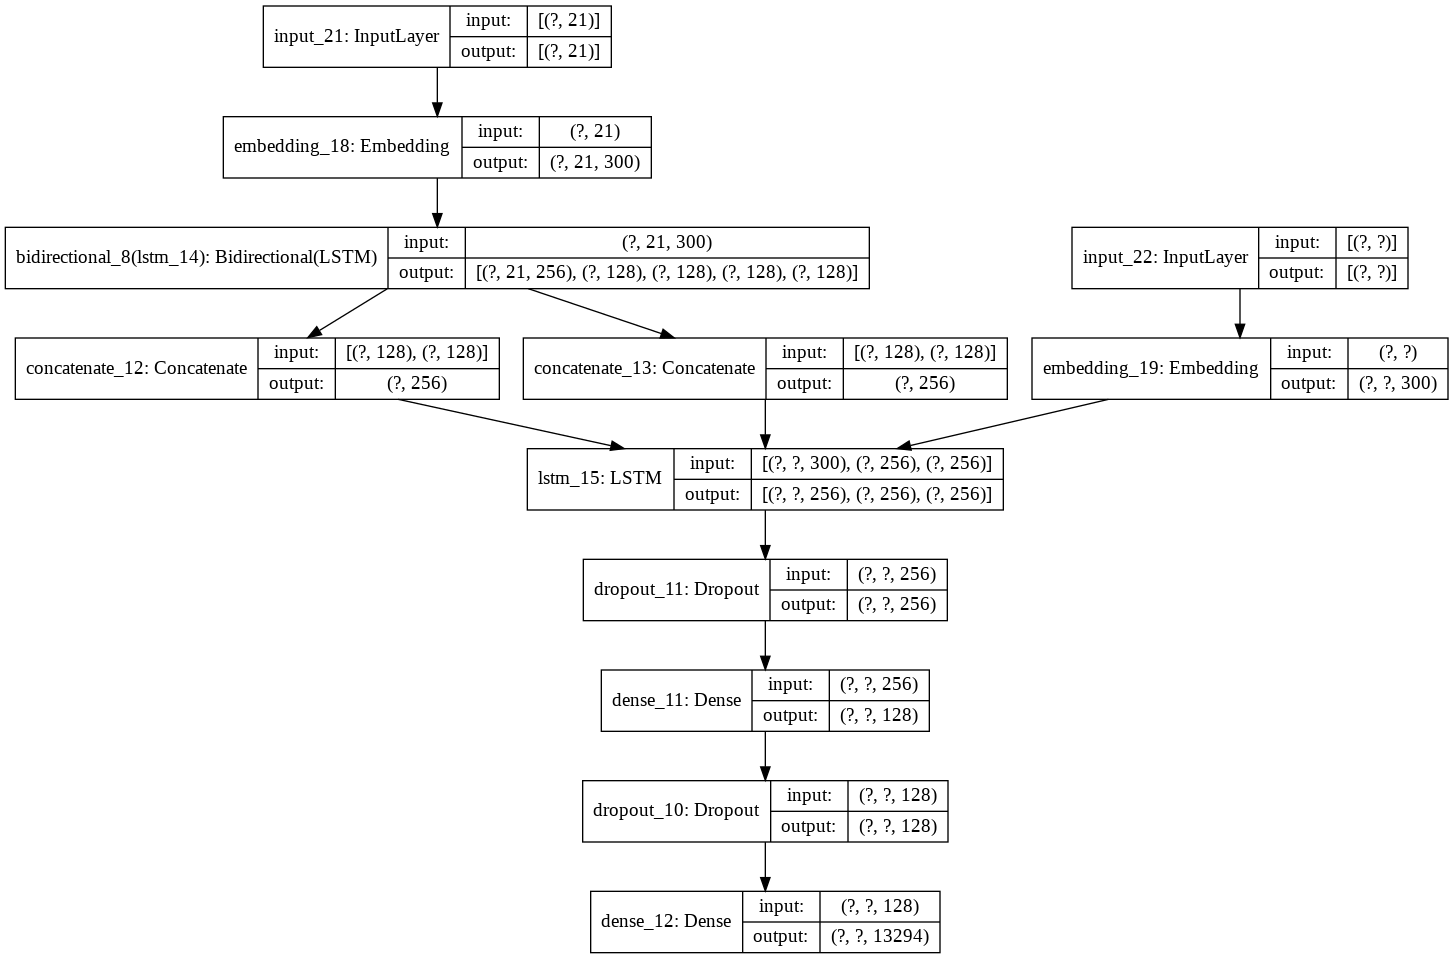

In [70]:
#encoder-decoder model structure
keras.utils.plot_model(model, "encoder-decoder.png", show_shapes=True)

Epoch 1/5
2780/2780 [==============================] - 405s 146ms/step - loss: 1.1846 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.9399 - val_sparse_categorical_accuracy: 0.8303
Epoch 2/5
2780/2780 [==============================] - 403s 145ms/step - loss: 0.8802 - sparse_categorical_accuracy: 0.8359 - val_loss: 0.7689 - val_sparse_categorical_accuracy: 0.8491
Epoch 3/5
2780/2780 [==============================] - 399s 143ms/step - loss: 0.7585 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.6661 - val_sparse_categorical_accuracy: 0.8636
Epoch 4/5
2780/2780 [==============================] - 395s 142ms/step - loss: 0.6789 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.5983 - val_sparse_categorical_accuracy: 0.8753
Epoch 5/5
2780/2780 [==============================] - 394s 142ms/step - loss: 0.6223 - sparse_categorical_accuracy: 0.8702 - val_loss: 0.5455 - val_sparse_categorical_accuracy: 0.8852


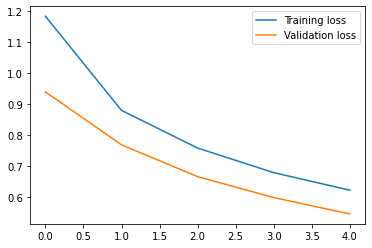

In [72]:
#training the model and printing the training and validation losses
epochs = 5
history = model.fit([encoder_input_train, decoder_input_train], decoder_target_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_split=0.2)

def plot_history(history):
    plt.plot(history.history['loss'], label="Training loss")
    plt.plot(history.history['val_loss'], label="Validation loss")
    plt.legend()

plot_history(history)

In [73]:
#printing the best loss and perplexity achievable
scores = model.evaluate([encoder_input_test[:1000], decoder_input_test[:1000]], decoder_target_test[:1000])
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

32/32 [==============================] - 1s 23ms/step - loss: 0.5571 - sparse_categorical_accuracy: 0.8834
sparse_categorical_accuracy: 0.88


In [76]:
# Create the encoder model from the tensors we previously declared.
encoder_model = keras.Model(encoder_inputs, [encoder_out, state_h, state_c])

# Generate a new set of tensors for our new inference decoder. Note that we are using new tensors, 
# this does not preclude using the same underlying layers that we trained on. (e.g. weights/biases).

inf_decoder_inputs = Input(shape=(1,), name="inf_decoder_inputs")
# We'll need to force feed the two state variables into the decoder each step.
state_input_h = Input(shape=(units*2,), name="state_input_h")
state_input_c = Input(shape=(units*2,), name="state_input_c")
decoder_res, decoder_h, decoder_c = decoder_lstm(
    decoder_emb(inf_decoder_inputs), 
    initial_state=[state_input_h, state_input_c])
inf_decoder_out = decoder_d2(decoder_d1(decoder_res))
inf_model = keras.Model(inputs=[inf_decoder_inputs, state_input_h, state_input_c], 
                  outputs=[inf_decoder_out, decoder_h, decoder_c])

In [43]:
# Inference Decoder
encoder_model = keras.models.Model(encoder_in_layer, state_h)

state_input_h = keras.layers.Input(shape=(latent_dim * 2,))
inf_decoder_out, decoder_h = decoder_gru(decoder_embedding(decoder_in_layer), initial_state=state_input_h)
inf_decoder_out = decoder_dense(decoder_dense_1(inf_decoder_out))
inf_model = keras.models.Model(inputs=[decoder_in_layer, state_input_h], 
                  outputs=[inf_decoder_out, decoder_h])

NameError: ignored

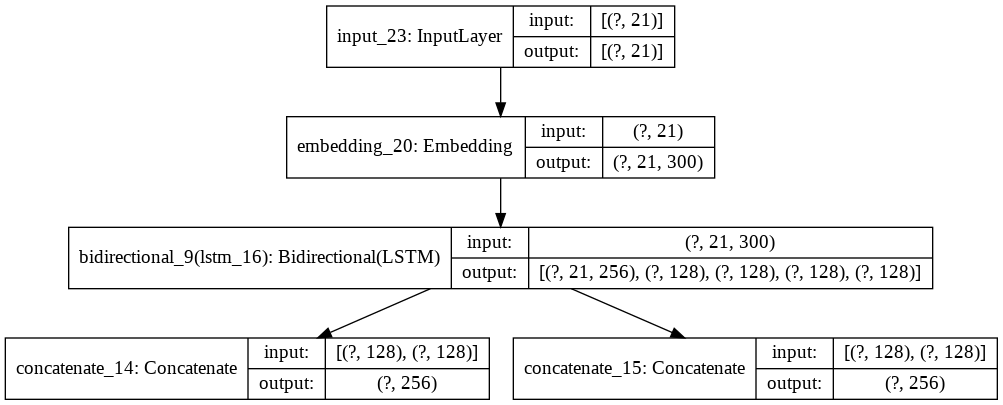

In [81]:
#the encoder model structure
keras.utils.plot_model(encoder_model, "encoder-model.png", show_shapes=True)

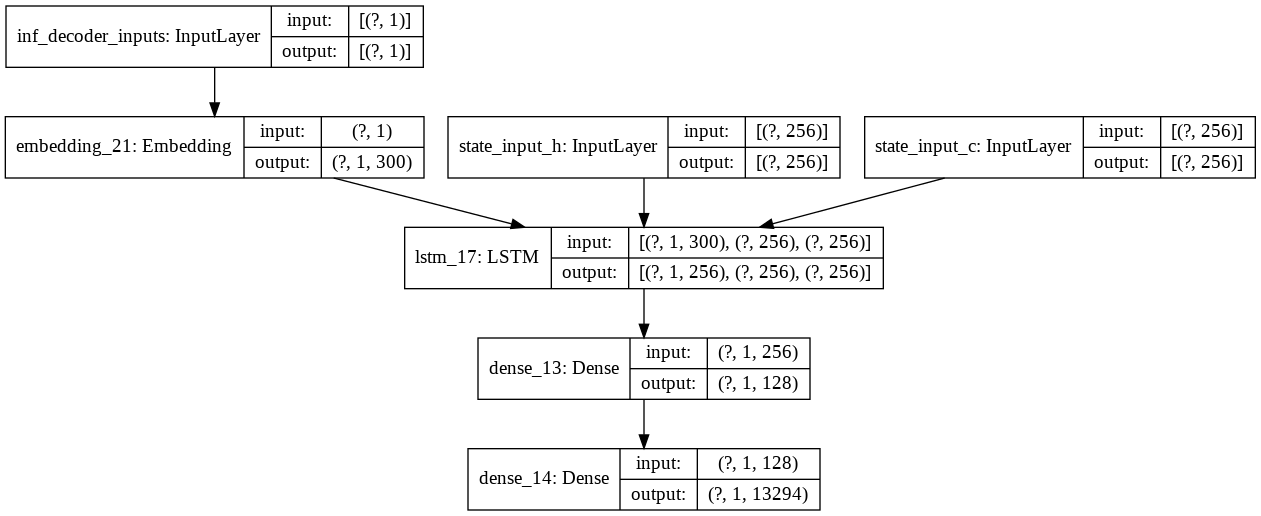

In [82]:
#inference model structure
keras.utils.plot_model(inf_model, "inference-model.png", show_shapes=True)

In [83]:
# Converts the given sentence (just a string) into a vector of word IDs
# Output is 1-D: [timesteps/words]

def sentence_to_vector(sentence, lang):

    pre = sentence
    vec = np.zeros(len_input)
    sentence_list = [lang.word2idx[s] for s in pre.split(' ')]
    for i,w in enumerate(sentence_list):
        vec[i] = w
    return vec

# Given an input string, an encoder model (infenc_model) and a decoder model (infmodel),
def translate(input_sentence, infenc_model, infmodel):
    sv = sentence_to_vector(input_sentence, input_lang)
    sv = sv.reshape(1,len(sv))
    [emb_out, sh, sc] = infenc_model.predict(x=sv)
    
    i = 0
    start_vec = target_lang.word2idx["<start>"]
    stop_vec = target_lang.word2idx["<end>"]
    
    cur_vec = np.zeros((1,1))
    cur_vec[0,0] = start_vec
    cur_word = "<start>"
    output_sentence = ""

    while cur_word != "<end>" and i < (len_target-1):
        i += 1
        if cur_word != "<start>":
            output_sentence = output_sentence + " " + cur_word
        x_in = [cur_vec, sh, sc]
        [nvec, sh, sc] = infmodel.predict(x=x_in)
        cur_vec[0,0] = np.argmax(nvec[0,0])
        cur_word = target_lang.idx2word[np.argmax(nvec[0,0])]
    return output_sentence

In [86]:
def tokenize_text(text):
    text = '<start> ' + text.lower() + ' <end>'
    text_tensor = tokenizer.texts_to_sequences([text])
    text_tensor = keras.preprocessing.sequence.pad_sequences(text_tensor, maxlen=max_length_in, padding="post")
    return text_tensor

# Reversed map from a tokenizer index to a word
index_to_word = dict(map(reversed, tokenizer.word_index.items()))

# Given an input string, an encoder model (infenc_model) and a decoder model (infmodel),
def decode_sequence(input_tensor):
    # Encode the input as state vectors.
    state = encoder_model.predict(input_tensor)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer.word_index['<start>']
    curr_word = "<start>"
    decoded_sentence = ''

    i = 0
    while curr_word != "<end>" and i < (max_length_out - 1):
        output_tokens, h = inf_model.predict([target_seq, state])
        curr_token = np.argmax(output_tokens[0, 0])

        if (curr_token == 0):
            break;

        curr_word = index_to_word[curr_token]

        decoded_sentence += ' ' + curr_word
        target_seq[0, 0] = curr_token
        state = h
        i += 1

    return decoded_sentence
  #converting tokens to sequence
def tokens_to_seq(tokens):
    words = list(map(lambda token: index_to_word[token] if token != 0 else '', tokens))
    return ' '.join(words)
decode_sequence('have a')

KeyError: ignored

In [85]:
#Note that only words that we've trained the model on will be available, otherwise you'll get an error.


test = ['please help ',
    'are you',
    'have a',
    'please review',
    'please call me',
    'thanks for',
    'let me',
    'Let me know',
    'Let me know if you',
    'this sounds',
    'is this call going to',
    'can you get',
    'is it okay',
    'it should',
    'call if there\'s',
    'gave her a',
    'i will let',
    'i will be',
    'may i get a copy of all the',
    'how is our trade',
    'this looks like a',
    'i am fine with the changes',
    'please be sure this'
]
  

import pandas as pd
output = []  
for t in test:
  output.append({"Input seq":t.lower(), "Pred. Seq":translate(t.lower(), encoder_model, inf_model)})

results_df = pd.DataFrame.from_dict(output) 
results_df.head(len(test))

KeyError: ignored

In [80]:
#testing of the inference models with some inputs inside the text array (note-the input must be present inside the splitted pairs of sentence)
texts = ['please help ',
    'are you',
    'have a',
    'please review',
    'please call me',
    'thanks for',
    'let me',
    'Let me know',
    'Let me know if you',
    'this sounds',
    'is this call going to',
    'can you get',
    'is it okay',
    'it should',
    'call if there\'s',
    'gave her a',
    'i will let',
    'i will be',
    'may i get a copy of all the',
    'how is our trade',
    'this looks like a',
    'i am fine with the changes',
    'please be sure this'
]
#inference outputs
output = list(map(lambda text: (text, decode_sequence(tokenize_text(text))), texts))

output_df = pd.DataFrame(output, columns=["input", "output"])
output_df.head(len(output))

ValueError: ignored

In [48]:
saved_model_dir = './'
tf.saved_model.save(encoder_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('enc_model.tflite', 'wb') as f:
  f.write(tflite_model)


tf.saved_model.save(inf_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('inf_model.tflite', 'wb') as f:
  f.write(tflite_model)





Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets
INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


In [49]:
shutil.copy('/content/enc_model.tflite','/content/drive/My Drive/Colab Notebooks/model snap/enc_model_1024_3_7_e2_50em.tflite')
shutil.copy('/content/inf_model.tflite','/content/drive/My Drive/Colab Notebooks/model snap/inf_model_1024_3_7_e2_50em.tflite')

'/content/drive/My Drive/Colab Notebooks/model snap/inf_model_1024_3_7_e2_50em.tflite'

In [ ]:
from google.colab import drive
drive.unmount('/content/drive')

AttributeError: ignored